Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

---

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from statistics import mean


In [3]:
filename = 'iris.data' #reading the dataset
df = pd.read_csv(filename,names =['sepal length', 'sepal width','petal length', 'petal width','specie']  ,header=None)

In [4]:
df.head(3)#peek into data set

,sepal length,sepal width,petal length,petal width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df.describe(include='all')

,sepal length,sepal width,petal length,petal width,specie
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Petal width vs Petal length')

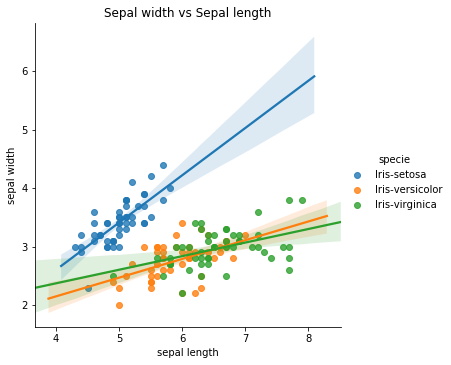

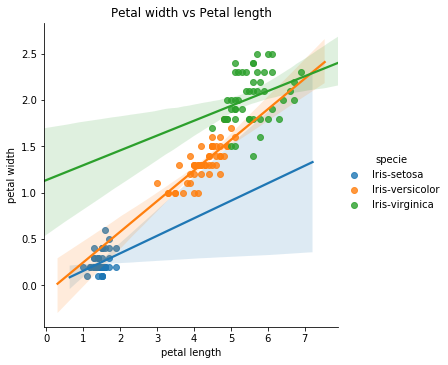

In [6]:
sns.lmplot(x='sepal length', y = 'sepal width', hue = 'specie', data =df)#sepal length & width scatter plot of iris types
plt.title ('Sepal width vs Sepal length')
sns.lmplot(x='petal length', y = 'petal width', hue = 'specie',data =df)#petal length & width scatter plot of iris types
plt.title ('Petal width vs Petal length')

In [15]:
X = np.array(df.iloc[:,0:4])#preparing the independent variables for knn
y=np.array(df['specie'])#preparing the dependent variables for knn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)#train/test split of the dataset
knn = KNeighborsClassifier(n_neighbors=10)#instatiate the model

In [16]:
#verify shape of train/test sets
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [17]:
knn.fit(X_train,y_train) #fit the model using the train data
y_pred=knn.predict(X_test) #run predictions of the classification based on test data and assign y_pred
print('accuracy score is', accuracy_score(y_test,y_pred)) #print accuracy score of specific instatiate where k = 10
print('non false predictions:',np.count_nonzero(y_test==y_pred)) #count number nonfalse predictions
print('false predictions:',np.count_nonzero(y_test!=y_pred))

accuracy score is 0.9666666666666667
non false predictions: 58
false predictions: 2


In [53]:
k = [1, 3, 5, 7, 10, 20, 30, 40, 50] # Creating a list of ks
avg_nz=[] # This will store the average number of correct prediction for each k
avg_score= [] # This list will store average accuracy store for each k
for i in k:
    split=np.random.uniform(low=0.1, high=0.6, size=(10))# list with 10 random train/test splits criteria
    score=[] # this will store accuracy score for each split for particular k
    nz=[] #this will store correct predictions for each split for a a particular k
    print("k =",i)
    print("test sizes:", split)
    for j in split:
        knn1 = KNeighborsClassifier(n_neighbors=i) #instantiate for that k
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=j) # split the data 
        knn1.fit(X_train,y_train)# fit the model
        y_pred=knn1.predict(X_test) # find prediction
        nz.append(np.count_nonzero(y_test==y_pred)) # total correct predictions are added in the list
        score.append(accuracy_score(y_test,y_pred)) #accuracy score for each i is added in the list
    avg_score.append(np.mean(score))# for particular k, finding the avg accuracy score
    avg_nz.append(np.mean(nz)) # for particular k, finding the avg of correct predictions4
  
    print("Average correct predictions: ", np.mean(nz))
    print("Average accuracy score:", round(np.mean(score),3))
    print("")

k = 1
test sizes: [0.49475579 0.5430803  0.46572143 0.30673722 0.278482   0.29579974
 0.12197022 0.51904585 0.15307444 0.26323188]
Average correct predictions:  50.1
Average accuracy score: 0.97

k = 3
test sizes: [0.33498009 0.50631623 0.58364652 0.16556509 0.16364469 0.16566381
 0.30684719 0.56416396 0.25759103 0.17287805]
Average correct predictions:  46.8
Average accuracy score: 0.964

k = 5
test sizes: [0.38328214 0.52724745 0.22574815 0.31215967 0.57535682 0.1406946
 0.42076417 0.10413921 0.49486269 0.56780368]
Average correct predictions:  54.7
Average accuracy score: 0.953

k = 7
test sizes: [0.57130159 0.45173853 0.19711311 0.46337333 0.1642323  0.56406981
 0.48429682 0.1577854  0.24496547 0.44029407]
Average correct predictions:  54.3
Average accuracy score: 0.959

k = 10
test sizes: [0.3877957  0.36712843 0.56774088 0.26128956 0.17872461 0.15912482
 0.10157884 0.43069337 0.59852034 0.55109165]
Average correct predictions:  51.9
Average accuracy score: 0.96

k = 20
test sizes

Text(0.5, 1.0, 'Score vs k')

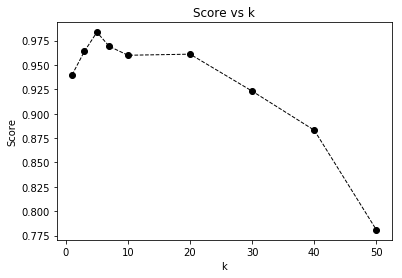

In [51]:
plt.plot(k,avg_score,color='black', marker='o', linestyle='dashed',linewidth=1, markersize=6)
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Score vs k')